In [2]:
#|default_exp app

## Dog vs Cat

In [4]:
#|export
import gradio as gr
from fastai.vision.all import *

def is_cat(x): return x[0].isupper() 

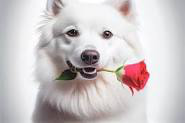

In [7]:
img = PILImage.create('puppy.jpeg')
img.thumbnail((192, 192))
img       

In [8]:
#|export
learn = load_learner('model.pkl')

In [12]:
%time learn.predict(img)

CPU times: user 1.71 s, sys: 477 ms, total: 2.18 s
Wall time: 342 ms


('False', tensor(0), tensor([9.9999e-01, 1.3130e-05]))

In [11]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,pred_idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))
    # return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [13]:
classify_image(img)

{'Dog': 0.9999868869781494, 'Cat': 1.3129938452038914e-05}

In [15]:
#|export
image = gr.inputs.Image(shape=(512, 512))
label = outputs=gr.outputs.Label()
examples = ['puppy.jpeg']

title = "Dog vs Cat Classifier"
description = "A Dog vs Cat classifier trained on the Oxford Pets dataset with fastai."
article="<p style='text-align: center'><a href='https://sirgil.org' target='_blank'>Sirgil Home</a></p>"
interpretation='default'
enable_queue=True

gr.Interface(fn=classify_image,inputs=image,outputs=label,title=title,description=description,article=article,examples=examples,interpretation=interpretation,enable_queue=enable_queue).launch()


/Users/abrahampelema/anaconda3/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `enable_queue` is deprecated in `Interface()`, please use it within `launch()` instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## Export

In [21]:
# from nbdev.export import notebook2script
# notebook2script('app.ipynb')

import nbdev
nbdev.export.nb_export('app.ipynb', './')
print('Export successful')

Export successful
